# Programming Tutorial 1 - Bootcamp Day 3 SOLUTIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Task 1: Get your data

* Look for a folder named *data* and you will find a csv file called *noaa_goes12_xrs_1m.csv*.
* Download this csv file to your local computer.
* Open this csv file in your programming language of choice.

In [2]:
# This is the location of the local file for my computer
data_file = './data/noaa_goes12_xrs_1m.csv'

In [3]:
df = pd.read_csv(data_file)

## Task 2: Data exploration

* What are the three columns of data that you have?
    * Answer: time, shortwave, longwave
* What format is the first column in?
    * Answer: year-month-dayThour-minute-second
* What are the units of the second column? The third column?
    * Answer: both are W/m^2
* If you are working in Python, try creating a new column in a pandas dataframe where the time is converted to datetime. See: [here](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) for documentation on pandas datetime.
* How many rows are there in this data?
    * Answer: 10081
* Are there any NaNs?
    * Answer: No rows are labeled as NaN, but keep reading!

In [4]:
# Use head to show the column names
df.head(5)

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2)
0,2003-10-24T00:00:00,2.630000e-07,0.000005
1,2003-10-24T00:01:00,2.500000e-07,0.000005
2,2003-10-24T00:02:00,2.440000e-07,0.000005
3,2003-10-24T00:03:00,2.400000e-07,0.000005
4,2003-10-24T00:04:00,2.370000e-07,0.000005


In [5]:
# Or use columns to get a list. The units are in parentheses.
df.columns

Index(['time (yyyy-MM-dd'T'HH:mm:ss)', 'shortwave (W/m^2)',
       'longwave (W/m^2)'],
      dtype='object')

In [6]:
# To convert to datetime, use to_datetime on the time column
df['datetime'] = pd.to_datetime(df['time (yyyy-MM-dd\'T\'HH:mm:ss)'])

In [7]:
# Use head to make sure your new column is there
df.head()

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2),datetime
0,2003-10-24T00:00:00,2.630000e-07,0.000005,2003-10-24 00:00:00
1,2003-10-24T00:01:00,2.500000e-07,0.000005,2003-10-24 00:01:00
2,2003-10-24T00:02:00,2.440000e-07,0.000005,2003-10-24 00:02:00
3,2003-10-24T00:03:00,2.400000e-07,0.000005,2003-10-24 00:03:00
4,2003-10-24T00:04:00,2.370000e-07,0.000005,2003-10-24 00:04:00


In [8]:
# You can use describe to show the number of rows
df.describe

<bound method NDFrame.describe of       time (yyyy-MM-dd'T'HH:mm:ss)  shortwave (W/m^2)  longwave (W/m^2)  \
0              2003-10-24T00:00:00       2.630000e-07          0.000005   
1              2003-10-24T00:01:00       2.500000e-07          0.000005   
2              2003-10-24T00:02:00       2.440000e-07          0.000005   
3              2003-10-24T00:03:00       2.400000e-07          0.000005   
4              2003-10-24T00:04:00       2.370000e-07          0.000005   
...                            ...                ...               ...   
10076          2003-10-30T23:56:00       1.410000e-07          0.000003   
10077          2003-10-30T23:57:00       1.440000e-07          0.000003   
10078          2003-10-30T23:58:00       1.420000e-07          0.000003   
10079          2003-10-30T23:59:00       1.410000e-07          0.000003   
10080          2003-10-31T00:00:00       1.450000e-07          0.000003   

                 datetime  
0     2003-10-24 00:00:00  
1     200

In [9]:
# Or use shape[0] to show the number of rows. shape[1] shows the number of columns.
df.shape[0]

10081

In [10]:
# Use isna().sum() to see if there are any NaNs. Zero means there are no NaNs.
df.isna().sum()

time (yyyy-MM-dd'T'HH:mm:ss)    0
shortwave (W/m^2)               0
longwave (W/m^2)                0
datetime                        0
dtype: int64

## Task 3: Basic calculations

* Find the maximum and minimum shortwave values.
    * Answer: max 0.000488, min 2.27e-08
* Find the maximum and minimum longwave values.
    * Answer: max 0.00172, min 1.3e-06
* On what date do the data start?
    * Answer: October 24, 2003
* On what date do the data end?
    * Answer: October 31, 2003

In [11]:
print(f"shortwave min: {df['shortwave (W/m^2)'].min()}")
print(f"shortwave max: {df['shortwave (W/m^2)'].max()}")
print(f"longwave min: {df['longwave (W/m^2)'].min()}")
print(f"longwave max: {df['longwave (W/m^2)'].max()}")

shortwave min: -100000.0
shortwave max: 0.000488
longwave min: -100000.0
longwave max: 0.00172


Now you should notice something funky is going on with the min values. -100000.0 seems to be a filler for missing data. Let's [drop the rows](https://www.statology.org/pandas-drop-rows-with-value/) that have that value.

In [12]:
df = df[df['shortwave (W/m^2)'] != -100000.0]
df = df[df['longwave (W/m^2)'] != -100000.0]

Now let's try again!

In [13]:
print(f"shortwave min: {df['shortwave (W/m^2)'].min()}")
print(f"shortwave max: {df['shortwave (W/m^2)'].max()}")
print(f"longwave min: {df['longwave (W/m^2)'].min()}")
print(f"longwave max: {df['longwave (W/m^2)'].max()}")

shortwave min: 2.27e-08
shortwave max: 0.000488
longwave min: 1.3e-06
longwave max: 0.00172


In [14]:
df['time (yyyy-MM-dd\'T\'HH:mm:ss)'].min()

'2003-10-24T00:00:00'

In [15]:
df['time (yyyy-MM-dd\'T\'HH:mm:ss)'].max()

'2003-10-31T00:00:00'

## Task 4: Write a function

* Write a function that returns the average of the longwave and shortwave values for a single row. The inputs should be the longwave and shortwave values, the output should be the average.
* Make a new array (or Pandas dataframe column) that contains the average value calculated above for each row in the dataset.

In [16]:
def average_longwave_shortwave(longwave, shortwave):
    return (longwave + shortwave)/2.

In [17]:
df['avg'] = average_longwave_shortwave(df['longwave (W/m^2)'], df['shortwave (W/m^2)'])

In [18]:
df.head()

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2),datetime,avg
0,2003-10-24T00:00:00,2.630000e-07,0.000005,2003-10-24 00:00:00,0.000003
1,2003-10-24T00:01:00,2.500000e-07,0.000005,2003-10-24 00:01:00,0.000003
2,2003-10-24T00:02:00,2.440000e-07,0.000005,2003-10-24 00:02:00,0.000002
3,2003-10-24T00:03:00,2.400000e-07,0.000005,2003-10-24 00:03:00,0.000002
4,2003-10-24T00:04:00,2.370000e-07,0.000005,2003-10-24 00:04:00,0.000002


## Task 5: Plotting

* Plot the time (or datetime) values on the x-axis and shortwave values on the y-axis.
	* Add axis labels to your plot (including units!) and a title.
* Plot the time (or datetime) values on the x-axis and longwave values on the y-axis.
        * Add axis labels to your plot (including units!) and a title.
* Plot the time (or datetime) values on the x-axis and average of shortwave and longwave values from Task 4 on the y-axis.
        * Add axis labels to your plot (including units!) and a title.

<AxesSubplot:title={'center':'Shortwave over time'}, xlabel='datetime'>

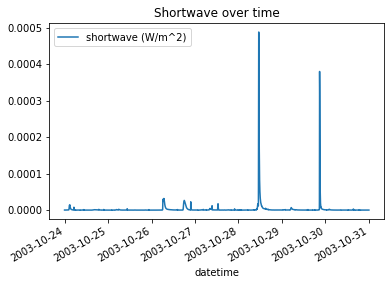

In [19]:
df.plot('datetime', 'shortwave (W/m^2)', title='Shortwave over time')

<AxesSubplot:title={'center':'Longwave over time'}, xlabel='datetime'>

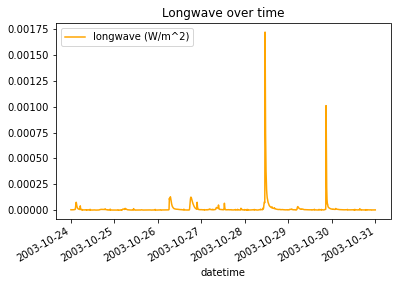

In [20]:
df.plot('datetime', 'longwave (W/m^2)', title='Longwave over time', color='orange')

<AxesSubplot:title={'center':'Average over time'}, xlabel='datetime', ylabel='Average (W/m^2)'>

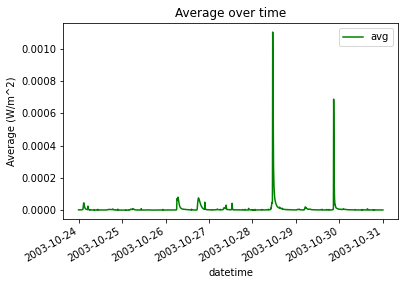

In [21]:
df.plot('datetime', 'avg', ylabel='Average (W/m^2)', title='Average over time', color='green')

<AxesSubplot:xlabel='datetime'>

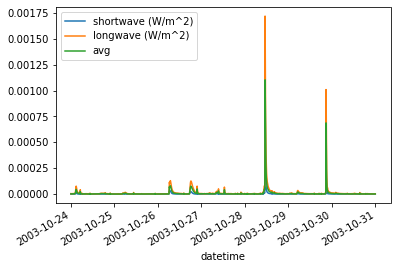

In [22]:
df.plot('datetime', ['shortwave (W/m^2)', 'longwave (W/m^2)', 'avg'])